1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


154.08540705748064


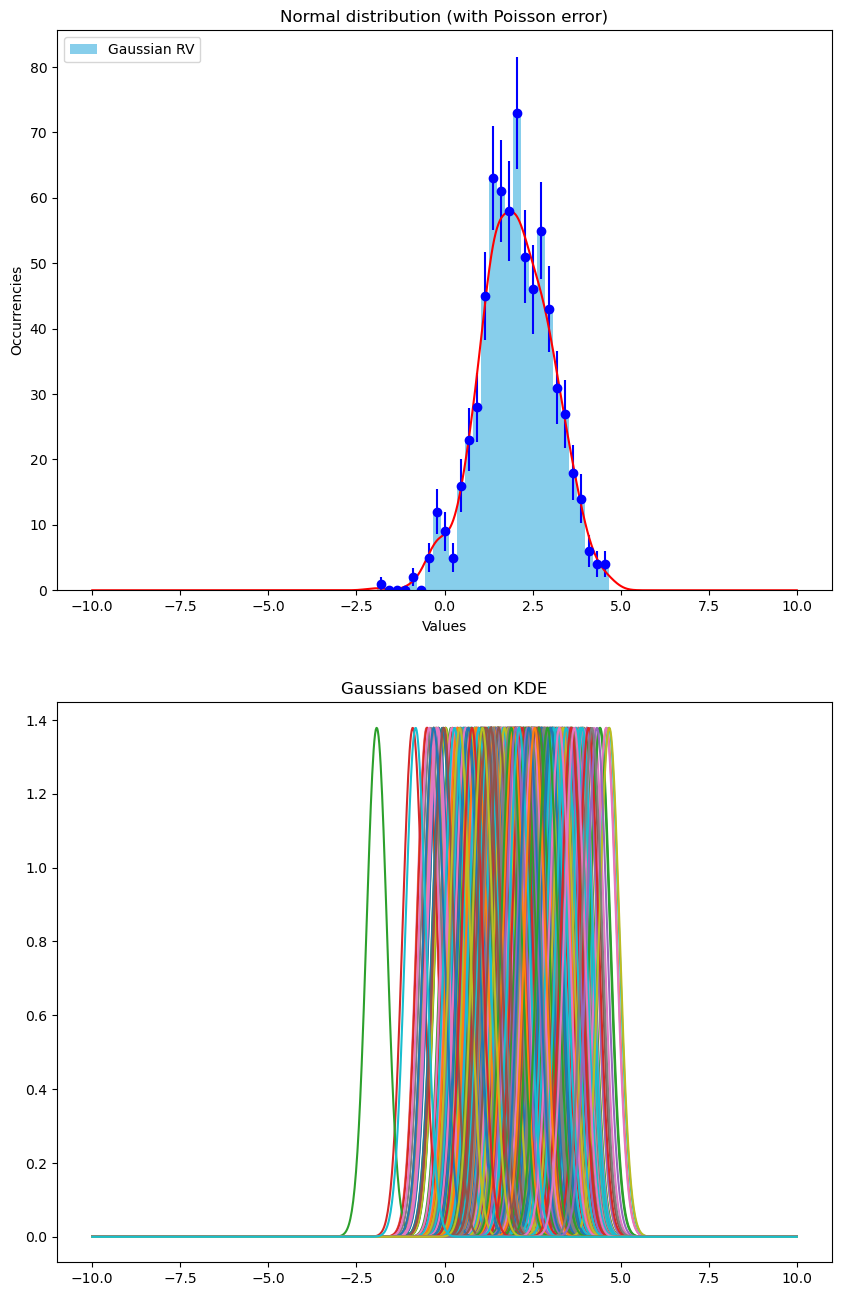

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from scipy import stats, integrate

mean = 2
sd = 1
N = 700
# creating an array
x = np.random.normal(mean, sd, N)

# filling an histogram with this array
fig, (ax, ax1) = plt.subplots(ncols = 1, nrows = 2,figsize=(10,16))
ax.hist(x, bins = np.linspace(x.min(), x.max(),30), label = "Gaussian RV", color = "skyblue")

# there is no built-in function to add errors on a hist (I miss u ROOT...)
# so we create a auxiliary function using
# plt.errorbar(x = ..., y = ..., xerr = ..., yerr = ..., ...)
# we thus have to get both x and y
bin_centers =  (np.linspace(x.min(), x.max(), 30)[:-1]  +  np.linspace(x.min(), x.max(),30)[1:]) /2
occ = [rect.get_height() for rect in ax.patches]
errors = np.sqrt([rect.get_height() for rect in ax.patches])
ax.errorbar(x = bin_centers, y = occ, yerr = errors, c= "b", fmt = "o")

ax.legend(loc="upper left")
ax.set_title("Normal distribution (with Poisson error)")
ax.set_xlabel("Values")
ax.set_ylabel("Occurrencies")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout

new_std = 1.06*np.std(x)*pow(len(x), -1./5.)
kde_functions = np.zeros(1000)

for i in range(len(x)):
    ax1.plot(np.linspace(-10,10, 1000), stats.norm.pdf(np.linspace(-10,10,1000), loc = x[i], scale= new_std) )
    kde_functions += stats.norm.pdf(np.linspace(-10,10,1000), loc = x[i], scale= new_std) 
#normalize
area = (integrate.trapezoid(kde_functions, np.linspace(-10,10, 1000)))
# area of the discretized histo:
area_old = np.sum([rect.get_height()*((x.max()-x.min())/ 30) for rect in ax.patches])
print(area_old)
kde_functions = kde_functions * area_old /area
ax.plot(np.linspace(-10,10, 1000), kde_functions, "r")
ax1.set_title("Gaussians based on KDE")
plt.show()



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2024-12-27 22:19:02--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/70o67xqfkicx6o3pofl37/two_categories_scatter_plot.png?rlkey=b1wnq5kkwhthz0cevmq0mxf35 [following]
--2024-12-27 22:19:02--  https://www.dropbox.com/scl/fi/70o67xqfkicx6o3pofl37/two_categories_scatter_plot.png?rlkey=b1wnq5kkwhthz0cevmq0mxf35
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8ec7b78c0a7edf5adce9cafe91.dl.dropboxusercontent.com/cd/0/inline/ChHTu-rJzFNkTyP_IcCqL3cbm27BlKm6j0tjyf8Ak9QTAaV2qEjTkU0thFR_Ny6mCpUl0U94B5_wiU--P88PniIsB2DYVvxAeglVTWEnuhk0KTqmyQTSGfqQJqALSl70An0/file# [following]
--2024-12-27 22:19:02--  https://uc8ec7b78c0a7edf5adce9cafe91.

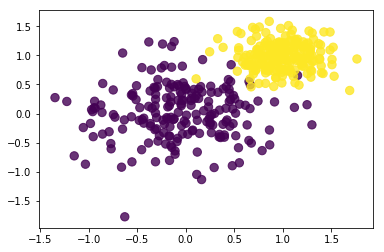

In [12]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

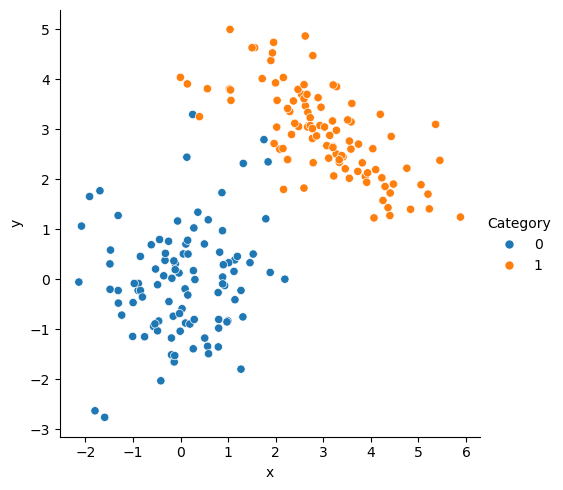

In [13]:
import pandas as pd
import seaborn as sns
print()

def createDataset(N1, N2):
    values_1 = np.random.multivariate_normal([0,0], [[1,0.2],[0.2,1]], size = N1)
    values_2 = np.random.multivariate_normal([3,3], [[1.5,-0.8],[-0.8,0.9]], size = N2)
    df = pd.DataFrame({
        "x" : np.concatenate( (values_1[:,0], values_2[:,0]) ),
        "y" : np.concatenate((values_1[:,1],values_2[:,1])),
        "Category" : np.concatenate((np.zeros(N1, "int"), np.ones(N2, "int")))
    })
    return df
data = createDataset(100,100)
sns.relplot(data, x = "x", y = "y", hue = "Category")
#fill in the first category

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

[SCIPY RESULT] Slope:  0.003259770122030576  intercept: -0.15432816763069465


<ErrorbarContainer object of 3 artists>

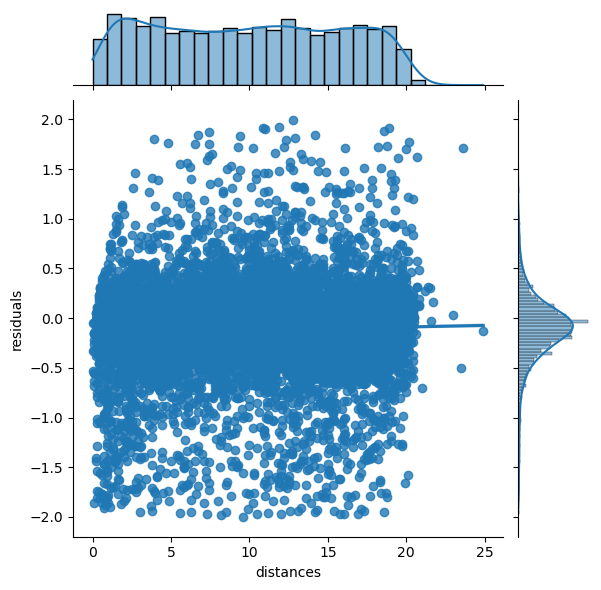

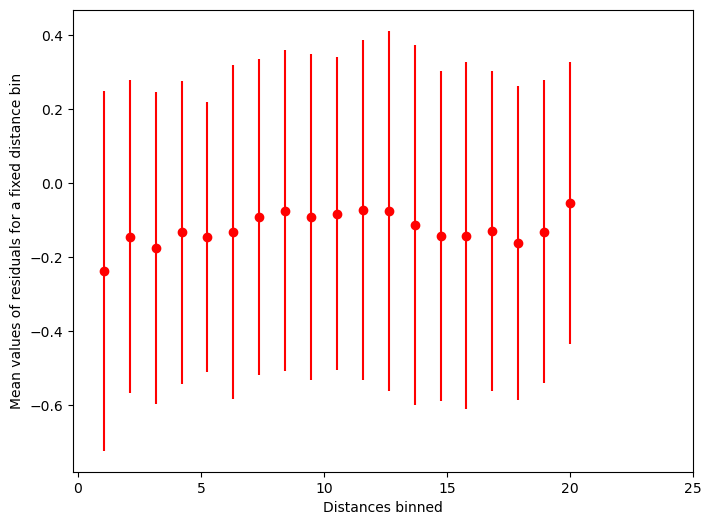

In [41]:
from scipy import stats

# loading the dataframe
df = pd.DataFrame(np.load("residuals_261.npy", allow_pickle=True).item())

# cleaning tha dataset
df=df[abs(df["residuals"]) < 2]
#performing the linear regression
reg_result = stats.linregress(df["distances"], df["residuals"])
print("[SCIPY RESULT] Slope: ", reg_result.slope, " intercept:", reg_result.intercept)

# now the same but with seaborn
res = sns.jointplot(df, x = "distances", y = "residuals", kind = "reg") 

N = 20
x = np.linspace(0,20,N)
y = np.zeros(N)
yerr = np.zeros(N)

for i in range(len(x)):
    filtered = df[(df["distances"] > x[i-1]) & (df["distances"] < x[i])]
    mean = filtered["residuals"].mean()
    err = np.std(filtered["residuals"])
    y[i] = mean
    yerr[i] = err

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlim(-0.2,25)
ax.set_xlabel("Distances binned")
ax.set_ylabel("Mean values of residuals for a fixed distance bin")
ax.errorbar(x=x,y=y,  yerr=yerr,c="r",fmt = "o")
